**Importing Libraries**

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**Read train and test data**

In [89]:
train=pd.read_csv('/content/train_ctrUa4K.csv')
test=pd.read_csv('/content/test_lAUu6dG.csv')

In [90]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Check unique values in train dataset**

In [91]:
train['Loan_ID'].nunique()

614

In [92]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


**Check unique values in test dataset**

In [93]:
test['Loan_ID'].nunique()

367

**Drop Loan_ID column in both train and test dataset**

In [94]:
train.drop('Loan_ID',axis=1,inplace=True)
test.drop('Loan_ID',axis=1,inplace=True)

In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


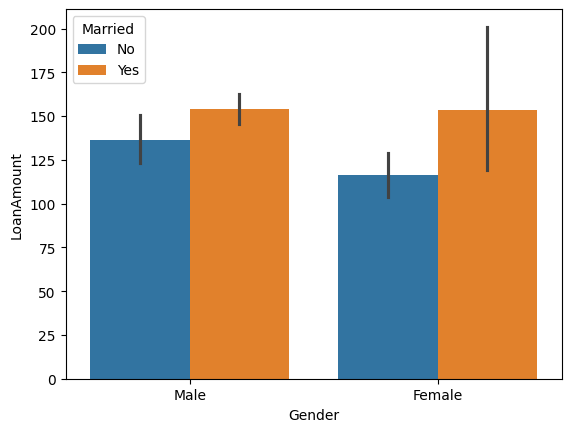

In [97]:
sns.barplot(x=train.Gender,y=train.LoanAmount,hue=train.Married)
plt.show()

**Checking null values in train dataset**

In [98]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Filling the null values**

In [99]:
for i in ['Gender','Married','Dependents','Self_Employed']:
    train[i]=train[i].fillna(train[i].mode()[0])

In [100]:
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
    print('Skewness value of column', i ,'=', train[i].skew())

Skewness value of column LoanAmount = 2.677551679256059
Skewness value of column Loan_Amount_Term = -2.362414124216269
Skewness value of column Credit_History = -1.8823610612186696


In [101]:
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
    train[i]=train[i].fillna(train[i].median())

In [102]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [103]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [104]:
train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [105]:
train['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [106]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

**Checking the outliers**

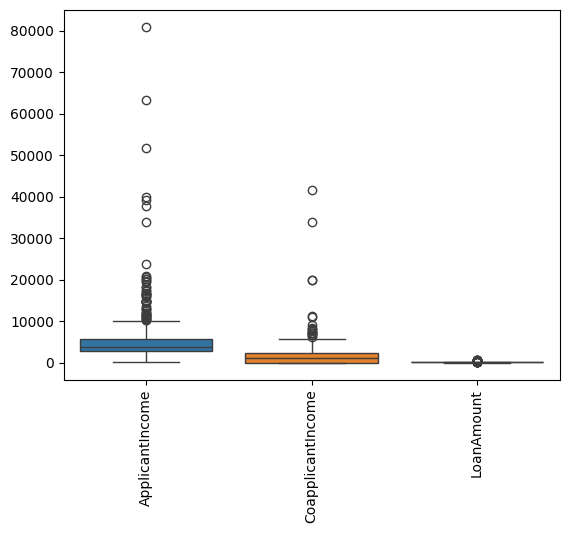

In [107]:
sns.boxplot(train[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
plt.xticks(rotation=90)
plt.show()

In [108]:
for i in ['ApplicantIncome','CoapplicantIncome']:
    print('Skewness value of column', i ,'=', train[i].skew())

Skewness value of column ApplicantIncome = 6.539513113994625
Skewness value of column CoapplicantIncome = 7.491531216657306


**Removing the outliers**

In [109]:
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    Q1=np.percentile(train[i],25,method='midpoint')
    Q3=np.percentile(train[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in train[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)
    train[i]=train[i].clip(lower=low_lim,upper=up_lim)

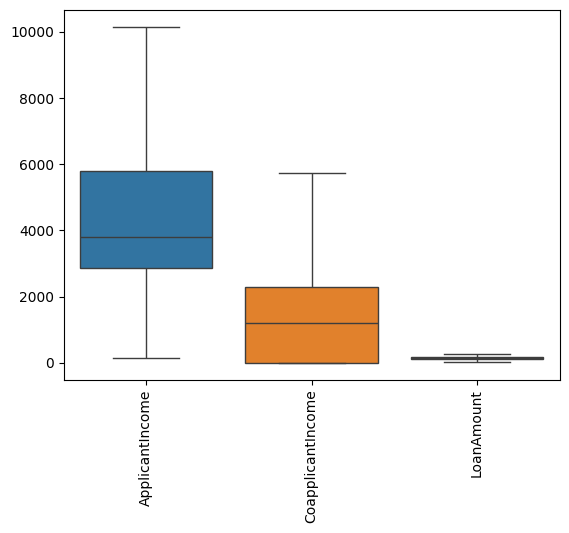

In [110]:
sns.boxplot(train[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
plt.xticks(rotation=90)
plt.show()

**Finding correlation**

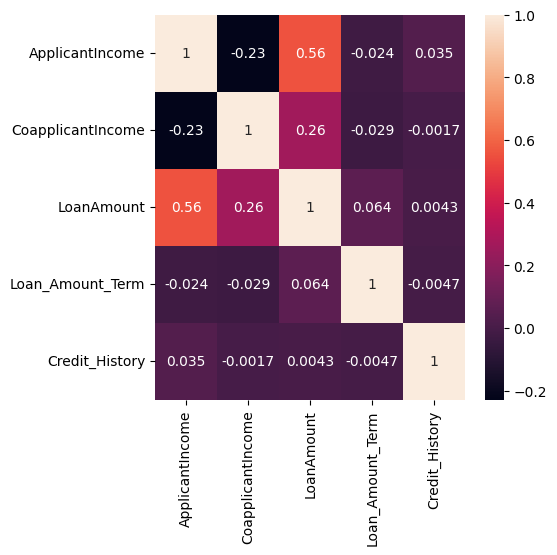

In [111]:
mat=train.select_dtypes(['int64','float64']).corr()
plt.subplots(figsize=(5,5))
sns.heatmap(mat,annot=True)
plt.show()

**Label Encoding**

In [112]:
le=LabelEncoder()
for i in ['Gender','Married','Dependents','Self_Employed','Education','Property_Area']:
    train[i]=le.fit_transform(train[i])

In [113]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,Y
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,0,Y
610,1,1,3,0,0,4106.0,0.0,40.0,180.0,1.0,0,Y
611,1,1,1,0,0,8072.0,240.0,253.0,360.0,1.0,2,Y
612,1,1,2,0,0,7583.0,0.0,187.0,360.0,1.0,2,Y


**Checking null values in test dataset**

In [114]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

**Filling null values**

In [115]:
for i in ['Gender','Dependents','Self_Employed']:
    test[i]=test[i].fillna(test[i].mode()[0])

In [116]:
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
    print('Skewness value of column', i ,'=', test[i].skew())

Skewness value of column LoanAmount = 2.223512207498288
Skewness value of column Loan_Amount_Term = -2.679317770196837
Skewness value of column Credit_History = -1.722378503506142


In [117]:
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
    test[i]=test[i].fillna(test[i].median())

In [118]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [119]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [120]:
test['Loan_Amount_Term'].value_counts()

360.0    317
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [121]:
test['Credit_History'].value_counts()

1.0    308
0.0     59
Name: Credit_History, dtype: int64

**Checking outliers**

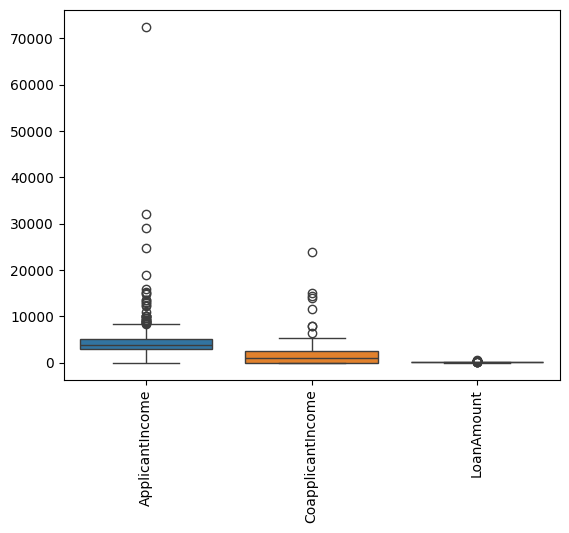

In [122]:
sns.boxplot(test[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
plt.xticks(rotation=90)
plt.show()

In [123]:
for i in ['ApplicantIncome','CoapplicantIncome']:
    print('Skewness value of column', i ,'=', test[i].skew())

Skewness value of column ApplicantIncome = 8.441374954190996
Skewness value of column CoapplicantIncome = 4.257356934477602


In [124]:
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    Q1=np.percentile(test[i],25,method='midpoint')
    Q3=np.percentile(test[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in test[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)
    test[i]=test[i].clip(lower=low_lim,upper=up_lim)

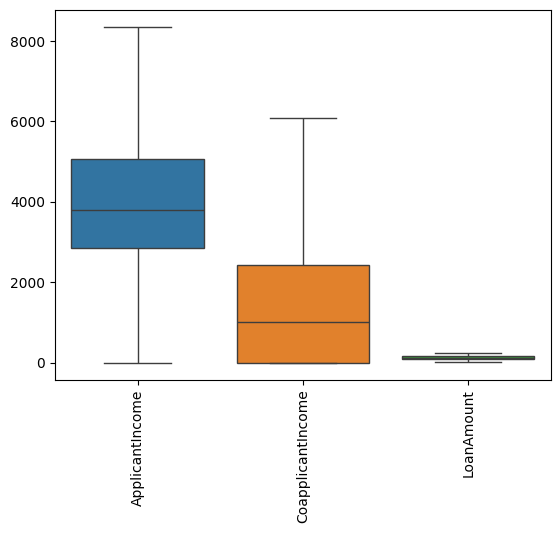

In [125]:
sns.boxplot(test[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
plt.xticks(rotation=90)
plt.show()

**Finding correlation**

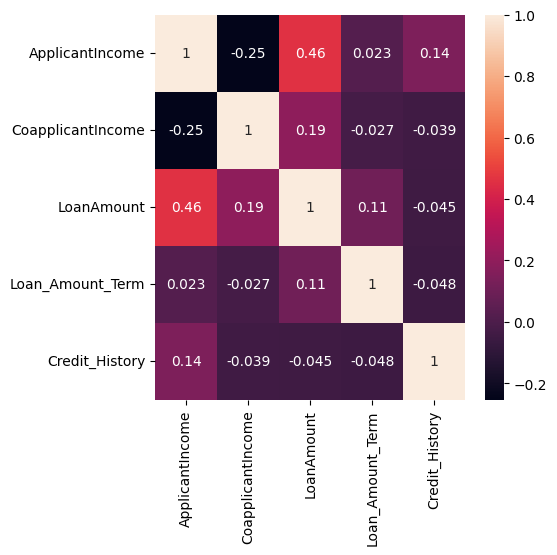

In [126]:
mat=test.select_dtypes(['int64','float64']).corr()
plt.subplots(figsize=(5,5))
sns.heatmap(mat,annot=True)
plt.show()

**Label Encoding**

In [127]:
le=LabelEncoder()
for i in ['Gender','Married','Dependents','Self_Employed','Education','Property_Area']:
    test[i]=le.fit_transform(test[i])

In [128]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0.0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500.0,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800.0,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546.0,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0.0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777.0,113.0,360.0,1.0,2
363,1,1,0,0,0,4158,709.0,115.0,360.0,1.0,2
364,1,0,0,0,0,3250,1993.0,126.0,360.0,1.0,1
365,1,1,0,0,0,5000,2393.0,158.0,360.0,1.0,0


In [129]:
x_train=train.drop('Loan_Status',axis=1)
y_train=train['Loan_Status']
x_test=test

**Standard scaling**

In [130]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_train_sc=pd.DataFrame(x_train_sc,columns=x_train.columns)
x_train_sc

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.498190,-0.874872,-0.167288,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.013296,0.054640,-0.167288,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.652856,-0.874872,-1.282678,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.821331,0.578570,-0.311209,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.559196,-0.874872,0.066584,0.273231,0.411733,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.693258,-0.874872,-1.192727,0.273231,0.411733,-1.318513
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.206013,-0.874872,-1.750422,-2.522836,0.411733,-1.318513
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,1.396320,-0.726939,2.081482,0.273231,0.411733,1.223298
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,1.198756,-0.874872,0.894131,0.273231,0.411733,1.223298


In [131]:
x_test_sc=sc.fit_transform(test)
x_test_sc=pd.DataFrame(x_test_sc,columns=x_test.columns)
x_test_sc

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.485479,0.758358,-0.758222,-0.544812,-0.334845,0.760162,-0.892107,-0.468560,0.266022,0.437674,1.118764
1,0.485479,0.758358,0.181871,-0.544812,-0.334845,-0.596907,0.046623,-0.127134,0.266022,0.437674,1.118764
2,0.485479,0.758358,1.121964,-0.544812,-0.334845,0.390612,0.234369,1.622677,0.266022,0.437674,1.118764
3,0.485479,0.758358,1.121964,-0.544812,-0.334845,-0.974669,0.701230,-0.681952,0.266022,0.437674,1.118764
4,0.485479,-1.318638,-0.758222,1.835497,-0.334845,-0.494255,-0.892107,-1.151413,0.266022,0.437674,1.118764
...,...,...,...,...,...,...,...,...,...,...,...
362,0.485479,0.758358,2.062056,1.835497,2.986456,-0.118032,0.219975,-0.404543,0.266022,0.437674,1.118764
363,0.485479,0.758358,-0.758222,-0.544812,-0.334845,-0.041556,-0.448401,-0.361864,0.266022,0.437674,1.118764
364,0.485479,-1.318638,-0.758222,-0.544812,-0.334845,-0.507600,0.355152,-0.127134,0.266022,0.437674,-0.095989
365,0.485479,0.758358,-0.758222,-0.544812,-0.334845,0.390612,0.605480,0.555719,0.266022,0.437674,-1.310741


**Logistic Regression**

In [132]:
log_reg=LogisticRegression(max_iter=10000)
log_reg.fit(x_train,y_train)
log_reg_pred=log_reg.predict(x_test)

**kNN**

In [133]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
classifier.fit(x_train,y_train)
knn_pred=classifier.predict(x_test)

In [134]:
sv_clf=SVC(kernel='linear')
sv_clf.fit(x_train,y_train)
svm_pred=sv_clf.predict(x_test)

**Decision tree classifier**

In [135]:
dt_clf=DecisionTreeClassifier(max_depth=20,criterion='entropy',min_samples_leaf=3)
dt_clf.fit(x_train,y_train)
dt_pred=dt_clf.predict(x_test)

**Random Forest Classifier **

In [136]:
rf_clf=RandomForestClassifier(n_estimators=50,max_depth=20,criterion='gini',min_samples_split=3)
rf_clf.fit(x_train,y_train)
rf_pred=rf_clf.predict(x_test)

In [137]:
log_reg_pred.shape

(367,)

In [138]:
sample=pd.read_csv('/content/sample_submission_49d68Cx.csv')
sample['Loan_Status']=log_reg_pred
sample

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [139]:
sample.to_csv('sample_log_reg.csv',index=False)

In [140]:
sample['Loan_Status']=knn_pred
sample.to_csv('sample_knn.csv',index=False)

In [141]:
sample['Loan_Status']=svm_pred
sample.to_csv('sample_svm.csv',index=False)

In [142]:
sample['Loan_Status']=dt_pred
sample.to_csv('sample_decision_tree.csv',index=False)

In [143]:
sample['Loan_Status']=rf_pred
sample.to_csv('sample_random_forest.csv',index=False)

In [144]:
log_reg_1=LogisticRegression(solver='lbfgs',max_iter=10000)
log_reg_1.fit(x_train,y_train)
log_reg_pred_1=log_reg_1.predict(x_test)

In [145]:
sample.to_csv('sample_log_reg_1.csv',index=False)

In [146]:
rf_clf_1=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
rf_clf_1.fit(x_train,y_train)
rf_pred_1=rf_clf_1.predict(x_test)

In [147]:
sample['Loan_Status']=rf_pred_1
sample.to_csv('sample_random_forest_1.csv',index=False)